In [74]:
import MDRMF as mf

In [75]:
data = mf.MoleculeLoader("10K.csv", "SMILES", "r_i_docking_score").df
featurizer = mf.Featurizer(data)
feats = featurizer.featurize("morgan", radius=2, nBits=512)

In [76]:
import numpy as np
import pickle

class Dataset:

    def __init__(self, X, y, ids=None, w=None) -> None:
        
        n_samples = np.shape(X)[0]

        if w is None:
            if len(y.shape) == 1:
                w = np.ones(y.shape[0], np.float32)
            else:
                w = np.ones((y.shape[0], 1), np.float32)

        if ids is None:
            ids = np.arange(n_samples)

        self.X = X
        self.y = y
        self.ids = np.array(ids, dtype=object)
        self.w = w

    def __repr__(self):
        return f"<Dataset X.shape: {self.X.shape}, y.shape: {self.y.shape}, w.shape: {self.w.shape}, ids: {self.ids}>"
    
    def save(self, filename):
        with open(filename, "wb") as f:
            pickle.dump(self, f)

    @staticmethod
    def load(filename):
        with open(filename, "rb") as f:
            return pickle.load(f)

In [77]:
X = feats
y = data['scores'].to_numpy()
ids = data['SMILES']

In [78]:
my_dataset = Dataset(X, y, ids)

In [79]:
my_dataset

<Dataset X.shape: (9898, 512), y.shape: (9898,), w.shape: (9898,), ids: ['C[C@@H](NC(=O)N1C[C@H](c2ccccc2)[C@H]2COCC[C@H]21)c1ccc(NC(=O)NC2CC2)cc1'
 'O=C(Nc1cccc(C(=O)N2CCC(c3c[nH]c4ncccc34)CC2)c1)[C@@H]1Cc2ccccc2O1'
 'Cc1nn(-c2ccccc2)c2nc(C(=O)N3CCC([C@H]4C(=O)Nc5ccccc54)CC3)ccc12' ...
 'Cn1cccc(C(=O)N2CCN(C3CC3)c3ccc(Cl)cc32)c1=O'
 'O=C([O-])[C@H]1CC[C@@H](C(=O)N2CCCc3ccccc32)CC1'
 'CCNS(=O)(=O)c1cc(NCCOC)ccn1']>

In [80]:
my_dataset.save("noob.pkl")

In [81]:
loaded_dataset = Dataset.load("noob.pkl")

In [82]:
loaded_dataset

<Dataset X.shape: (9898, 512), y.shape: (9898,), w.shape: (9898,), ids: ['C[C@@H](NC(=O)N1C[C@H](c2ccccc2)[C@H]2COCC[C@H]21)c1ccc(NC(=O)NC2CC2)cc1'
 'O=C(Nc1cccc(C(=O)N2CCC(c3c[nH]c4ncccc34)CC2)c1)[C@@H]1Cc2ccccc2O1'
 'Cc1nn(-c2ccccc2)c2nc(C(=O)N3CCC([C@H]4C(=O)Nc5ccccc54)CC3)ccc12' ...
 'Cn1cccc(C(=O)N2CCN(C3CC3)c3ccc(Cl)cc32)c1=O'
 'O=C([O-])[C@H]1CC[C@@H](C(=O)N2CCCc3ccccc32)CC1'
 'CCNS(=O)(=O)c1cc(NCCOC)ccn1']>

In [3]:
sample = dataset.sample(10)
dataset = dataset.drop(sample.index)

AttributeError: 'NoneType' object has no attribute 'sample'

In [ ]:
sample

,Unnamed: 0,i_i_glide_lignum,scores,SMILES,molecules,features
1982,1982,15233,-9.03660,Fc1ccc(-c2csc3ncnc(NCCCn4ccnc4)c23)cc1,<rdkit.Chem.rdchem.Mol object at 0x0000028AAAC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7348,7348,10749,-6.90536,CCc1ncnc(N2CCN(C(=O)c3ccco3)CC2)c1F,<rdkit.Chem.rdchem.Mol object at 0x0000028AAAC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
972,972,4734,-9.55164,O=C1CCCN1Cc1ccc(C(=O)N2CCC[C@@H](N3CCCS3(=O)=O...,<rdkit.Chem.rdchem.Mol object at 0x0000028AAAC...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
228,228,9813,-10.38270,O=C(c1ccc(F)cc1)N1CCCN(C(=O)[C@@H](O)c2ccc(Cl)...,<rdkit.Chem.rdchem.Mol object at 0x0000028AAAE...,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
113,113,5504,-10.74060,C[C@H]1CC[C@@H](O)CN1C(=O)Nc1c(-c2ccccc2)[nH]c...,<rdkit.Chem.rdchem.Mol object at 0x0000028AAAE...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1362,1362,3433,-9.33224,COc1cccc(-c2cc(C(=O)Nc3cnn(CC(N)=O)c3)[nH]n2)c1,<rdkit.Chem.rdchem.Mol object at 0x0000028AAAC...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1378,1378,2420,-9.32483,CC(C)[C@@H](c1nc(-c2cccnc2)no1)N1Cc2ccccc2C1=O,<rdkit.Chem.rdchem.Mol object at 0x0000028AAAC...,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."
981,981,13082,-9.54804,Cn1nc(C(C)(C)C)cc1C(=O)N1C[C@H](CO)c2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x0000028AAAC...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3435,3435,4017,-8.51741,C[C@@H](Oc1ccccc1Cl)C(=O)N1CCC(c2ccnn2C)CC1,<rdkit.Chem.rdchem.Mol object at 0x0000028AAAC...,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9367,9367,7194,-5.06176,C[C@H]([NH2+]CC1(c2ccc(Cl)cc2)CCOCC1)c1nnnn1C,<rdkit.Chem.rdchem.Mol object at 0x0000028AAAC...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import numpy as np
X = np.vstack(sample['features'].values)
x = sample['features']
y = sample['scores'].to_numpy()

In [ ]:
X

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int8)

In [ ]:
model = RandomForestRegressor()

model.fit(X, y)

RandomForestRegressor()

In [ ]:
preds = model.predict(X)

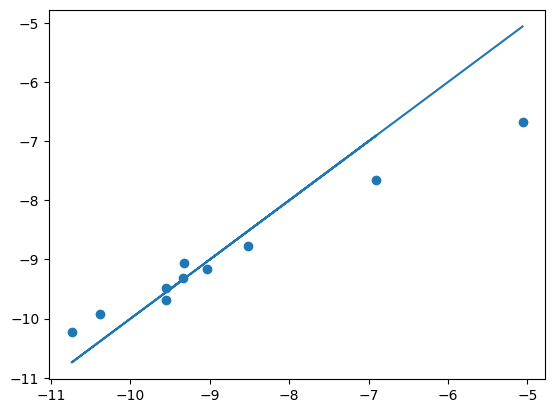

In [ ]:
from matplotlib import pyplot as plt

plt.plot(y, y)
plt.scatter(y, preds)